# ***Bike Rental Forecasting***

### **Importing Packages**

 The four main packages for machine learning in Python are numpy, pandas, scikit learn(sklearn), and xgboost.The other required packages imported below too.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### **Read and Manipulate the data**

Read the training and testing set which is from https://www.kaggle.com/bike-sharing-demand

In [2]:
train = pd.read_csv("train_BS.csv")
test = pd.read_csv("test_BS.csv")

Check the correlations between the attributes in dataset and check whether which attribute is highly correlated with "count" attribute

In [3]:
corr_matrix = train.corr()
corr_matrix["count"].sort_values(ascending = False)

count         1.000000
registered    0.970948
casual        0.690414
temp          0.394454
atemp         0.389784
season        0.163439
windspeed     0.101369
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64

Seaborn's "Heatmap" virtualizes the correlation between the attributes

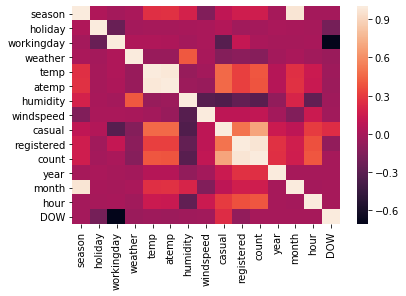

In [70]:
sns.heatmap(train.corr())

Scatter plot visualizing the Highly correlated attribute and Receprocatively highly correlated Attributes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6dc8852fd0>,
      dtype=object)

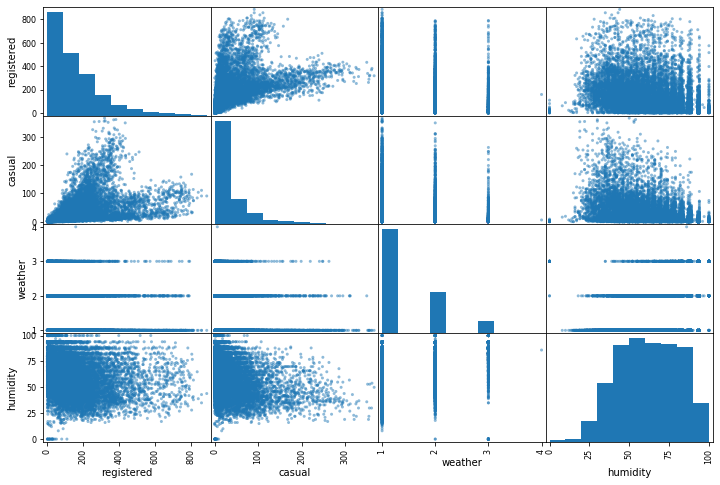

In [5]:
from pandas.plotting import scatter_matrix
attributes = ["registered","casual","weather","humidity"]
scatter_matrix(train[attributes],figsize = (12,8),alpha = 0.5)

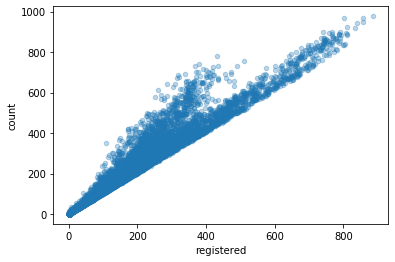

In [6]:
train.plot(kind = "scatter", x = "registered", y = "count",alpha = 0.3)

 Seaborn's factorplot visualizing casual attribute

/home/chinmay/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/chinmay/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


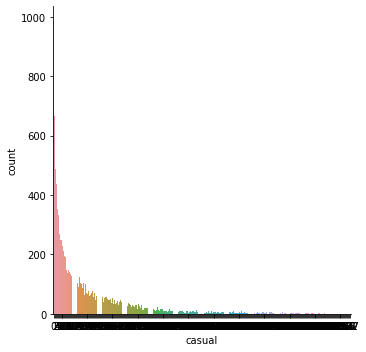

In [74]:
sns.factorplot(x = "casual",data = train,kind = "count",size = 5)

In [8]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [10]:
train.shape

(10886, 12)

In [11]:
test.shape

(6493, 9)

For consistency, adding empty columns casual, registered and count. The entries in this column will be NaN which stands for "Not No."

In [12]:
test["casual"] = np.NaN
test["registered"] = np.NaN
test["count"] = np.NaN

In [13]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,NaN,NaN,NaN
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,NaN,NaN,NaN
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,NaN,NaN,NaN
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,NaN,NaN,NaN
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,NaN,NaN,NaN


In [14]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [15]:
test.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual        float64
registered    float64
count         float64
dtype: object

In [16]:
train["datetime"] =  pd.to_datetime(train["datetime"])
test["datetime"] = pd.to_datetime(test["datetime"])

In [17]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 12 columns):
datetime      6493 non-null datetime64[ns]
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
casual        0 non-null float64
registered    0 non-null float64
count         0 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(5)
memory usage: 608.8 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6dc66203c8>,
      dtype=object)

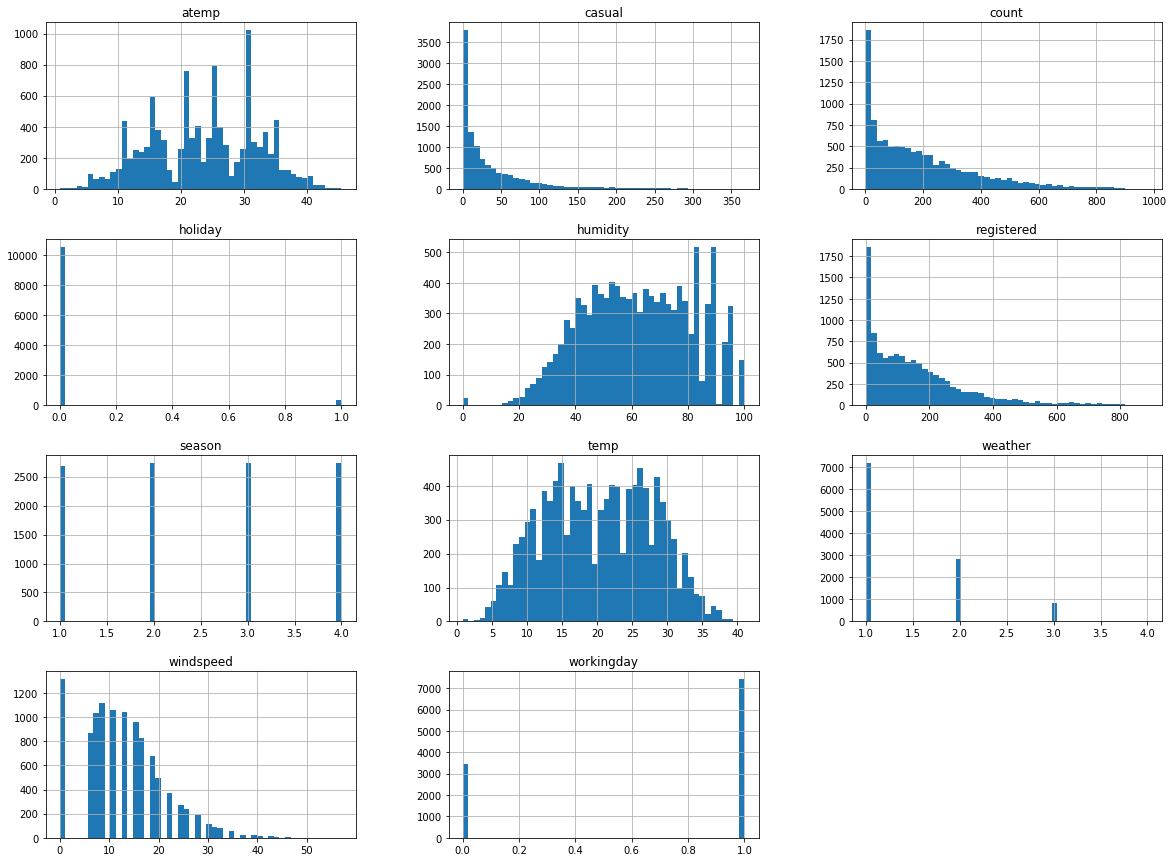

In [20]:
train.hist(bins = 50, figsize = (20,15))

### **Feature Engineering**

Since datetime is not in format. This helps in creating three different attributes year, month, hour and Day of Week(DOW).

In [21]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["hour"] = train["datetime"].dt.hour
train["DOW"] = train["datetime"].dt.dayofweek

test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["hour"] = test["datetime"].dt.hour
test["DOW"] = test["datetime"].dt.dayofweek

In [22]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,DOW
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4,5


In [23]:
train.iloc[3,11]

13

In [63]:
list(train.iloc[3])

[Timestamp('2011-01-01 03:00:00'),
 1,
 0,
 0,
 1,
 9.84,
 14.395,
 75,
 0.0,
 3,
 10,
 13,
 2011,
 1,
 3,
 5]

Picking some important attributes and creating train and test variable

In [24]:
ind_var = ["workingday","temp","year","month","hour","DOW"]

X_org_train = train[ind_var]
Y_org_train = train["count"]

In [25]:
X_org_test = test[ind_var]
Y_org_test = test["count"]

In [58]:
list(X_org_test.iloc[0])

[1.0, 10.66, 2011.0, 1.0, 0.0, 3.0]

In [65]:
X_org_test.head()

,workingday,temp,year,month,hour,DOW
0,1,10.66,2011,1,0,3
1,1,10.66,2011,1,1,3
2,1,10.66,2011,1,2,3
3,1,10.66,2011,1,3,3
4,1,10.66,2011,1,4,3


### **Set up the Score**

We are using Root mean square error for evaluation.

In [26]:
def RMSE(pred, realizations):
    preds = pred.clip(0)
    rmse = np.sqrt(np.mean(np.array(np.log(preds + 1) - np.log(realizations + 1)) ** 2))
    return rmse

### **Create Smaller training and Validation sets**

Splitting the original train test in to small train and test splits in 75% and 25% Resp.

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X_org_train, Y_org_train, test_size = 0.25, random_state =42)
X_train.shape

(8164, 6)

In [66]:
Y_org_train.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [30]:
X_train.head()

,workingday,temp,year,month,hour,DOW
2930,1,28.70,2011,7,0,0
7669,1,22.96,2012,5,22,4
1346,1,12.30,2011,4,23,4
9432,0,23.78,2012,9,9,6
453,1,8.20,2011,2,23,1


In [31]:
Y_train.head()

2930     35
7669    251
1346     53
9432    296
453      16
Name: count, dtype: int64

### **Fit a Decision Tree Regressor**

A Decision tree is tuned with min_samples_split. It's default 20, it means 20 samples are required in any node for that to be splitted. Once node has fewer than 20 samples in it, no more splits will occur. The smaller you set the sample tree the more deeper the fitted tree we get.

In [32]:
regressor_dt = DecisionTreeRegressor(min_samples_split = 25, random_state = 42)
dt_model = regressor_dt.fit(X_train,Y_train)
pred_dt = regressor_dt.predict(X_test)

In [33]:
pd.DataFrame(dt_model.feature_importances_, index = ind_var)

,0
workingday,0.039808
temp,0.079635
year,0.095215
month,0.067710
hour,0.683110
DOW,0.034522


Plot the tree prediction vs actuals.

Text(0, 0.5, 'Actual values')

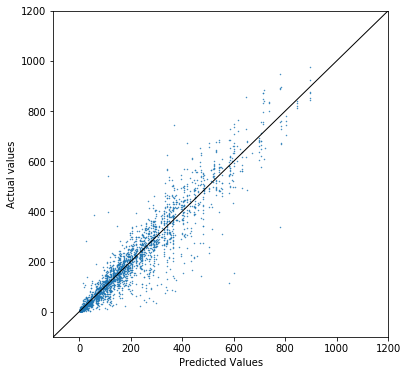

In [34]:
plt.figure(figsize = (6,6))
plt.scatter(pred_dt,Y_test, s = 0.2)
plt.xlim(-100,1200)
plt.ylim(-100,1200)
plt.plot([-100,1200],[-100,1200],color = "black",linestyle = "-",linewidth = 1)
plt.xlabel("Predicted Values")
plt.ylabel("Actual values")

In [35]:
RMSE(pred_dt,Y_test)

0.39552943674538593

### **Fit a Random Forest**

The random forest's main tuning parameter is max_features that is the number of variables it randomly selects to split on at each node and min_sample_leaf is number of sample in each terminal node.

In [36]:
regressor_rf = RandomForestRegressor(n_estimators = 500, max_features = 4, min_samples_leaf = 5, random_state = 42)
rf_model = regressor_rf.fit(X_train, Y_train)
pred_rf = regressor_rf.predict(X_test)

Look at the importances of the variable. Which feature is most important the more important the feature. 

In [37]:
pd.DataFrame(rf_model.feature_importances_,index = ind_var)

,0
workingday,0.042126
temp,0.124508
year,0.089486
month,0.059459
hour,0.637728
DOW,0.046693


Plot the predictions vs actuals.

Text(0, 0.5, 'Actual Values')

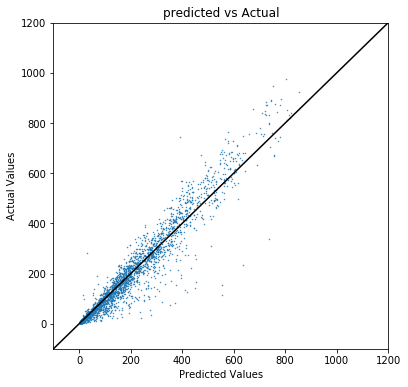

In [38]:
plt.figure(figsize = (6,6))
plt.scatter(pred_rf, Y_test, s = 0.2)
plt.xlim(-100,1200)
plt.ylim(-100,1200)
plt.plot([-100,1200],[-100,1200], color = "black")
plt.title("predicted vs Actual")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

In [39]:
RMSE(pred_rf,Y_test)

0.36729603103611924

### **Fit a Boosted Trees Model**

The boosted tree model requires a special data structure as it's inputs.The next cell create such a structure for the smaller training and validation sets.

In [40]:
xgb_train = xgb.DMatrix(X_train,label = Y_train)
xgb_test = xgb.DMatrix(X_test)

In [41]:
num_cv = 500
param = {"max_depth": 6, "eta": 0.1, "seed": 201, "objective":"reg:linear"}

We first run xgboost in Cross validation mode to find out the best number of rounds to use.

In [42]:
xgb.cv(param, xgb_train, num_cv, nfold = 5, show_stdv = False, verbose_eval = True, as_pandas = False)

[17:53:26] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[17:53:26] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[17:53:26] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[17:53:26] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[17:53:26] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:240.96936	test-rmse:241.00051
[1]	train-rmse:221.22750	test-rmse:221.39083
[2]	train-rmse:203.48272	test-rmse:203.76588
[3]	train-rmse:187.96059	test-rmse:188.29848
[4]	train-rmse:173.88908	test-rmse:174.31568
[5]	train-rmse:161.69234	test-rmse:162.18947
[6]	train-rmse:150.94136	test-rmse:151.62956
[7]	train-rmse:140.88155	test-rmse:141.64850
[8]	t

{'train-rmse-mean': [240.96936340000002,
  221.2274962,
  203.482721,
  187.9605926,
  173.8890838,
  161.692337,
  150.9413608,
  140.881555,
  131.76690680000002,
  123.841948,
  116.3192168,
  109.7657592,
  103.58011300000001,
  98.408197,
  93.6440676,
  89.4218872,
  85.58952339999999,
  82.1093704,
  79.49561780000002,
  76.6228834,
  73.74470199999999,
  71.2461488,
  68.7138412,
  66.6892364,
  64.7588522,
  62.9370392,
  61.1525802,
  59.7955588,
  58.58955219999999,
  57.5793044,
  56.755415400000004,
  55.869777,
  55.184535999999994,
  54.5316984,
  54.0483482,
  53.3620796,
  52.824746000000005,
  52.3089112,
  51.907074,
  51.357622400000004,
  51.07249,
  50.679499,
  50.2537964,
  49.8310654,
  49.55600499999999,
  49.229402400000005,
  48.9800918,
  48.7669434,
  48.4926314,
  48.2551978,
  47.960929,
  47.7921982,
  47.5804726,
  47.404129,
  47.1762176,
  46.927092,
  46.7707926,
  46.560659,
  46.448951799999996,
  46.2296708,
  46.1115668,
  46.00100880000001,
  4

Choose the number of rounds with the lowest test-RMSE and rerun the model below.

In [43]:
num_round = 400
xgb_model = xgb.train(param ,xgb_train, num_round)
xgb_pred = xgb_model.predict(xgb_test)

[17:53:51] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


Get the unnormalized feature importance scores.

In [44]:
xgb_model.get_fscore()

{'hour': 6350,
 'DOW': 3737,
 'temp': 5596,
 'month': 3342,
 'year': 1533,
 'workingday': 1027}

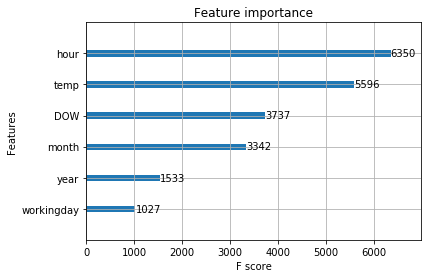

In [45]:
xgb.plot_importance(xgb_model)

Text(0, 0.5, 'Actual Values')

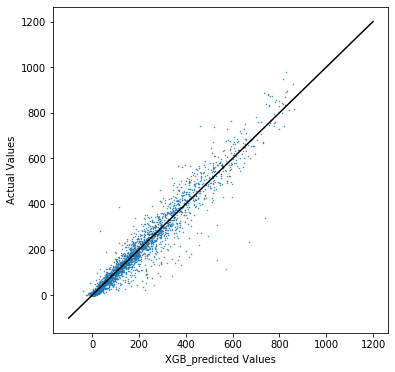

In [46]:
plt.figure(figsize = (6,6))
plt.scatter(xgb_pred, Y_test, s = 0.2)
plt.plot([-100,1200],[-100,1200], color = "black",)
plt.xlabel("XGB_predicted Values")
plt.ylabel("Actual Values")

In [47]:
RMSE(xgb_pred, Y_test)

0.46621270002307086

### **Make predictions in the Testing set**

Firstly retrain the model on the original training set.

In [48]:
dt_model_retrain = dt_model.fit(X_org_train, Y_org_train)
dt_pred_test = dt_model_retrain.predict(X_test)
dt_pred_test_clipped = pd.Series(dt_pred_test.clip(0))

In [49]:
dt_pred_test.shape

(2722,)

In [50]:
rf_model_retrain = rf_model.fit(X_org_train, Y_org_train)
rf_pred_test = rf_model_retrain.predict(X_test)
rf_pred_test_clipped = pd.Series(rf_pred_test.clip(0))

In [51]:
rf_pred_test.shape

(2722,)

In [52]:
xgb_org_train = xgb.DMatrix(X_org_train,Y_org_train)
xgb_test = xgb.DMatrix(X_test)
xgb_model_retrain = xgb.train(param, xgb_org_train, num_cv)
xgb_pred_test = xgb_model_retrain.predict(xgb_train)
xgb_pred_test_clipped = pd.Series(xgb_pred_test.clip(0))

[17:54:01] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [53]:
xgb_pred_test.shape

(8164,)